In [3]:
### Binary classification -> Neural networks.
###classifying circles

In [4]:
##dependencies
from sklearn.datasets import make_circles #generate circles
import pandas as pd ##creating data frame
import matplotlib.pyplot as plt ##for drawing plots
import torch #creating tensors
from torch import nn ## basic building block of neural networks

In [5]:
## make   1000 samples 
n_samples = 1000
x, y = make_circles(
    n_samples,
    noise=0.02,
    random_state=30
)

In [6]:
## visualizing my data
##dataframe
circles = pd.DataFrame({
    'X1': x[:, 0], 
    'X2': x[:, 1],
    'Labels': y
})

circles.head(10)
##circles['Labels'].value_counts()

,X1,X2,Labels
0,0.471109,-0.688698,1
1,0.470924,-0.657534,1
2,0.757632,0.133427,1
3,0.441729,0.914881,0
4,0.064846,-0.799789,1
5,0.913613,-0.459859,0
6,0.182394,0.992764,0
7,-0.799707,-0.551241,0
8,0.488100,-0.869731,0
9,-0.357087,0.743005,1


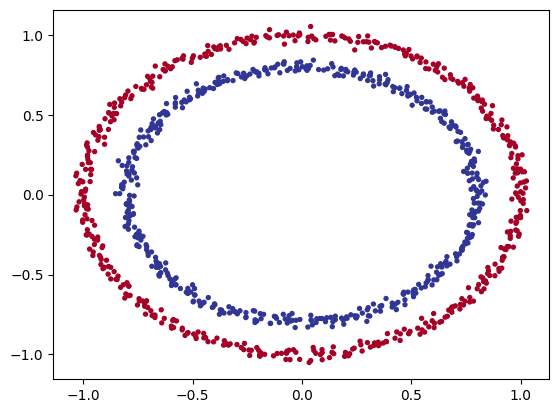

In [7]:
### drawing plots
plt.scatter(
    x=x[:,0],
    y=x[:,1],
    s=8,
    c=y,
    cmap=plt.cm.RdYlBu
)
plt.show()

In [8]:
##turn data into training and testing data
###input and output shapes 
##x.shape, y.shape

x_tensor = torch.from_numpy(x).type(torch.float)
y_tensor = torch.from_numpy(y).type(torch.float).unsqueeze(dim=1)

#x_tensor.shape, y_tensor.shape
#x_tensor, y_tensor

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(
    x_tensor,
    y_tensor, 
    test_size=0.2, #20% test data, 80% training data
    random_state=30
)

print(f"X training data: {len(X_train)}\nX Test Data: {len(X_test)}\n Y_train Data: {len(Y_train)}\n Y Test DATA: {len(Y_test)}")

X training data: 800
X Test Data: 200
 Y_train Data: 800
 Y Test DATA: 200


In [11]:
##device agnostic
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [12]:
### create a model
model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5), #2 inputs (x) with 1 hidden layer (5 neurons)
    nn.Linear(in_features=5, out_features=1) #1 output y
).to(device)